In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

# Import Dataset

In [2]:
emails_dfs=pd.read_csv('./emails.csv')
emails_dfs.shape

(517401, 2)

In [4]:
emails_df=emails_dfs.head(10000)

# Dataset Transformation in columns

In [5]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['date','x-from', 'x-to','subject']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

In [6]:
def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    return {
        'date':[email['date'] for email in emails],
        'sender' : [email['x-from'] for email in emails],
        'receiver': [email['x-to'] for email in emails], 
        'subject':[email['subject'] for email in emails],
        'body': [email['body'] for email in emails]
        
        
    }


In [7]:
emails = [parse_raw_message(message) for message in emails_df.message]
for email in emails:
    print (email)

{'date': 'Mon, 14 May 2001 16', 'subject': '', 'x-from': 'Phillip K Allen', 'x-to': 'Tim Belden <Tim Belden/Enron@EnronXGate>', 'body': 'Here is our forecast'}
{'date': 'Fri, 4 May 2001 13', 'subject': 'Re', 'x-from': 'Phillip K Allen', 'x-to': 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>', 'body': "Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.My suggestion for where to go is

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
email_df = pd.DataFrame(parse_into_emails(emails_df.message))

# Drop emails with empty body

In [9]:
email_df.drop(email_df.query("body == ''").index, inplace=True)

In [10]:
email_df

,date,sender,receiver,subject,body
0,"Mon, 14 May 2001 16",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,Here is our forecast
1,"Fri, 4 May 2001 13",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Re,Traveling to have a business meeting takes the...
2,"Wed, 18 Oct 2000 03",Phillip K Allen,Leah Van Arsdall,Re,test successful. way to go!!!
3,"Mon, 23 Oct 2000 06",Phillip K Allen,Randall L Gay,,"Randy,Can you send me a schedule of the salary..."
5,"Thu, 31 Aug 2000 04",Phillip K Allen,Greg Piper,Re,"Greg,How about either next Tuesday or Thursday..."
6,"Tue, 22 Aug 2000 07",Phillip K Allen,"david.l.johnson@enron.com, John Shafer",,Phillip Allen (pallen@enron.com)Mike Grigsby (...
8,"Tue, 17 Oct 2000 02",Phillip K Allen,Mark Scott,Re,I don't think these are required by the ISP2. ...
9,"Mon, 16 Oct 2000 06",Phillip K Allen,zimam@enron.com,FW,---------------------- Forwarded by Phillip K ...
10,"Mon, 16 Oct 2000 06",Phillip K Allen,"""Buckner, Buck"" <buck.buckner@honeywell.com> @...",Re,"Mr. Buckner,For delivered gas behind San Diego..."
11,"Fri, 13 Oct 2000 06",Phillip K Allen,stagecoachmama@hotmail.com,,"Lucy,Open them and save in the rentroll folder..."


In [11]:
import gensim.corpora as corpora

In [12]:
from gensim.utils import simple_preprocess

In [13]:
from gensim.models import CoherenceModel

In [14]:
import spacy

In [18]:
import gensim
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt

# Preprocessing the emails

In [ ]:
#Transforming the different emails' body to a list

In [19]:
data=email_df.body.values.tolist()

In [ ]:
# Transforming each emails into tokens 

In [20]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


In [21]:
data_words = list(sent_to_words(data))
print(data_words[3])

['randy', 'can', 'you', 'send', 'me', 'schedule', 'of', 'the', 'salary', 'and', 'level', 'of', 'everyone', 'in', 'thescheduling', 'group', 'plus', 'your', 'thoughts', 'on', 'any', 'changes', 'that', 'need', 'to', 'be', 'made', 'patti', 'for', 'example', 'phillip']


In [ ]:
#Building bigrams and trigrams 

In [22]:
from gensim.models.phrases import Phrases, Phraser
# Build the bigram and trigram models
bigram = Phrases(data_words, min_count=5, threshold=100)
trigram = Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[200]]])

['tara', 'janie', 'tholtfrank', 'ermissteve', 'southtory', 'kuykendallmatt_lenhartrandy', 'gaywe', 'are', 'making', 'markets', 'on', 'one', 'day', 'gas', 'daily', 'swaps', 'thank', 'you', 'phillip_allen']


In [23]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
# Lemmatizing the emails 

In [24]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Removing stopwords

In [25]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [26]:
#removing other irrelevant words
stop_words= ENGLISH_STOP_WORDS.union(['forwarded', 'Forwarded','enron','thank','thanks','com','na','03','email','000','etc','hou','ect'])

In [27]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [28]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
#Preparing the data for the lda model

In [29]:
# Creating a  Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [30]:
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# modeling : using lda model

In [31]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [32]:
print(lda_model.print_topics())

[(0, '0.155*"commercial" + 0.080*"instead" + 0.040*"category" + 0.017*"convert" + 0.014*"promote" + 0.012*"central" + 0.012*"duty" + 0.001*"favorably" + 0.000*"iso" + 0.000*"state"'), (1, '0.122*"click" + 0.108*"request" + 0.094*"participant" + 0.074*"program" + 0.044*"action" + 0.039*"important" + 0.032*"experience" + 0.029*"delete" + 0.026*"participation" + 0.024*"active"'), (2, '0.170*"response" + 0.076*"swap" + 0.075*"mark" + 0.069*"spread" + 0.032*"monitor" + 0.028*"premium" + 0.026*"kid" + 0.017*"scheduling" + 0.014*"ride" + 0.006*"setting"'), (3, '0.065*"know" + 0.050*"just" + 0.047*"time" + 0.039*"let" + 0.039*"make" + 0.037*"day" + 0.034*"think" + 0.034*"week" + 0.033*"get" + 0.032*"go"'), (4, '0.085*"visit" + 0.053*"tour" + 0.025*"enclose" + 0.000*"great" + 0.000*"hope" + 0.000*"love" + 0.000*"attend" + 0.000*"unable" + 0.000*"advise" + 0.000*"department"'), (5, '0.077*"meeting" + 0.074*"attach" + 0.073*"deal" + 0.037*"forward" + 0.036*"file" + 0.034*"group" + 0.034*"issue" +

In [ ]:
# evaluating the model using two criteria : coherence and perplexity 

In [33]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -16.776427328784493


In [29]:
# Compute Coherence Score : the higher the better 
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.387894581797224


In [34]:
doc_lda = lda_model[corpus]

In [ ]:
# modeling : using lsi model

In [35]:
lsi = gensim.models.lsimodel.LsiModel(corpus, id2word=id2word, num_topics=20)
for i in  lsi.show_topics(num_words=4):
    print (i[0], i[1])

0 -0.886*"font" + -0.456*"size" + -0.057*"tr" + -0.022*"gas"
1 0.504*"say" + 0.415*"company" + 0.173*"share" + 0.169*"stock"
2 0.993*"image" + -0.037*"say" + -0.035*"company" + 0.034*"change"
3 0.327*"power" + -0.299*"share" + 0.277*"gas" + -0.265*"company"
4 -0.368*"price" + 0.343*"say" + -0.330*"market" + -0.203*"mail"
5 -0.371*"dynegy" + -0.291*"say" + -0.256*"price" + 0.250*"mail"
6 -0.464*"dynegy" + -0.297*"mail" + 0.199*"power" + -0.194*"merger"
7 0.700*"mail" + 0.290*"ee" + 0.282*"say" + 0.270*"active"
8 0.558*"gas" + 0.221*"price" + -0.205*"say" + 0.190*"mail"
9 0.356*"company" + -0.349*"buy" + 0.302*"credit" + -0.213*"stock"
10 0.476*"message" + 0.306*"original" + -0.262*"market" + 0.219*"gas"
11 -0.329*"buy" + 0.236*"cost" + 0.201*"quarter" + -0.195*"stock"
12 0.990*"pgn" + -0.078*"buy" + -0.023*"downgrade" + 0.021*"cost"
13 0.546*"buy" + 0.175*"downgrade" + -0.167*"oil" + -0.162*"market"
14 -0.330*"text" + -0.312*"table" + -0.288*"tr" + 0.266*"message"
15 -0.360*"company" + 

In [32]:
# Show Topics
print(lsi.show_topics(formatted=False))

[(0, [('font', 0.8862364401267575), ('size', 0.4557993290146324), ('tr', 0.05732699085001901), ('gas', 0.021549586817494717), ('width', 0.02051935171246835), ('natural', 0.01600969043542053), ('valign', 0.014595597085691477), ('datum', 0.01448177543719531), ('align_right', 0.012245879017532962), ('company', 0.010303103803135849)]), (1, [('say', 0.5043523581942654), ('company', 0.4147888917575781), ('share', 0.17276482288670594), ('stock', 0.1693926488999929), ('year', 0.16520973240276723), ('market', 0.15607038804052753), ('price', 0.1378672432161673), ('energy', 0.12651460788324936), ('power', 0.11763972963349573), ('business', 0.10675123605272258)]), (2, [('image', -0.9926384184518948), ('say', 0.03658439059234812), ('company', 0.03497198344565774), ('change', -0.03387095019065112), ('market', -0.032100685746407336), ('story', -0.029592130289518882), ('share', 0.01913961123630352), ('click', -0.01909637287265486), ('mail', -0.01722650638767936), ('free', -0.0156111859478484)]), (3, [

In [ ]:
# evaluating the model using coherence

In [33]:
# Compute Coherence Score
coherence_model_lsi = CoherenceModel(model=lsi, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi)


Coherence Score:  0.40379533441950965


In [36]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.lsimodel.LsiModel(corpus, id2word=id2word, num_topics=20)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

In [ ]:
# show the coherence of each topic 

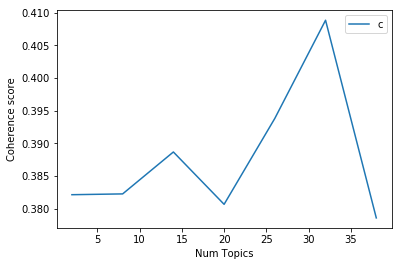

In [38]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.3822
Num Topics = 8  has Coherence Value of 0.3823
Num Topics = 14  has Coherence Value of 0.3887
Num Topics = 20  has Coherence Value of 0.3807
Num Topics = 26  has Coherence Value of 0.3938
Num Topics = 32  has Coherence Value of 0.4088
Num Topics = 38  has Coherence Value of 0.3786


In [40]:
print(model_list[6])
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

LsiModel(num_terms=29380, num_topics=20, decay=1.0, chunksize=20000)
[(0, '0.886*"font" + 0.456*"size" + 0.057*"tr" + 0.022*"gas" + 0.021*"width" + 0.016*"natural" + 0.015*"valign" + 0.014*"datum" + 0.012*"align_right" + 0.010*"company"'), (1, '0.504*"say" + 0.415*"company" + 0.173*"share" + 0.169*"stock" + 0.165*"year" + 0.156*"market" + 0.138*"price" + 0.127*"energy" + 0.118*"power" + 0.107*"business"'), (2, '0.993*"image" + -0.037*"say" + -0.035*"company" + 0.034*"change" + 0.032*"market" + 0.030*"story" + -0.019*"share" + 0.019*"click" + 0.017*"mail" + 0.016*"free"'), (3, '0.327*"power" + -0.299*"share" + 0.277*"gas" + -0.265*"company" + -0.215*"stock" + 0.177*"price" + 0.165*"state" + -0.161*"dynegy" + 0.151*"say" + -0.150*"investor"'), (4, '-0.368*"price" + 0.343*"say" + -0.330*"market" + -0.203*"mail" + 0.178*"company" + -0.169*"message" + -0.156*"iso" + 0.147*"project" + 0.139*"oil" + 0.125*"gas"'), (5, '-0.371*"dynegy" + -0.291*"say" + -0.256*"price" + 0.250*"mail" + 0.217*"co

In [ ]:
#Function to help us add the topics as features to our dataset : for every email we add the dominant topic in that email

In [41]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [42]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

In [43]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['email_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'body']

In [44]:
 #Show
df_dominant_topic.head(10)


,email_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,body
0,0,19.0,0.0191,"ee, stock, active, cost, loan, earning, buy, q...",Here is our forecast
1,1,5.0,1.3382,"dynegy, say, price, mail, company, message, tr...",Traveling to have a business meeting takes the...
2,2,8.0,0.0539,"gas, price, say, mail, natural, state, oil, bu...",test successful. way to go!!!
3,3,5.0,0.2281,"dynegy, say, price, mail, company, message, tr...","Randy,Can you send me a schedule of the salary..."
4,4,18.0,0.0049,"ee, message, buy, original, offer, credit, act...","Greg,How about either next Tuesday or Thursday..."
5,5,9.0,0.1172,"company, buy, credit, stock, line, say, partne...",Phillip Allen (pallen@enron.com)Mike Grigsby (...
6,6,3.0,5.6274,"power, share, gas, company, stock, price, stat...",I don't think these are required by the ISP2. ...
7,7,3.0,0.4043,"power, share, gas, company, stock, price, stat...",---------------------- Forwarded by Phillip K ...
8,8,16.0,0.1567,"year, buy, project, value, message, share, qua...","Mr. Buckner,For delivered gas behind San Diego..."
9,9,1.0,5.2546,"say, company, share, stock, year, market, pric...","Lucy,Open them and save in the rentroll folder..."


In [45]:
from pandas import DataFrame
n_clusters = 20
stopwords = ENGLISH_STOP_WORDS.union(['forwarded', 'Forwarded'])
vect = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.4, min_df=2)
X = vect.fit_transform(df_dominant_topic.body)

#features = vect.get_feature_names()

clf = KMeans(n_clusters=n_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)


In [46]:
X_dense = X.todense()
coords = PCA(n_components=10).fit_transform(X_dense)

In [47]:
labels = clf.fit_predict(coords)

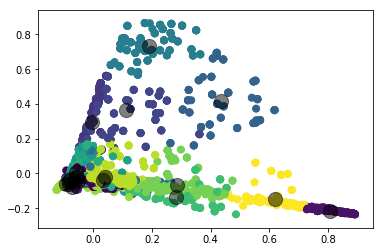

In [48]:

plt.scatter(coords[:, 0], coords[:, 1], c=labels, s=50, cmap='viridis')

centers = clf.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);